In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from operator import itemgetter

In [2]:
%matplotlib inline

## vid 14 0 bar plot example

## Read data

In [3]:
views = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=True, index_col='date')
views

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [4]:
# views.median()

In [5]:
# views.value.quantile(0.5)

In [6]:
# views.value.mean().round(1)

In [7]:
q_975 = views.value.quantile(0.975)
q_975

177613.075

In [8]:
q_025 = views.value.quantile(0.025)
q_025

17876.4

In [9]:
filt_outstanding = (views.value <= q_975) & (views.value >= q_025)

In [10]:
views_cleaned = views.loc[filt_outstanding, :].copy()
views_cleaned

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


## draw_line_plot


In [11]:
def draw_line_plot():
    # Draw line plot

    fig = plt.figure()
    
    # plot title
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    # axes labels
    plt.xlabel('Date')
    plt.ylabel('Page Views')

    # data
    x = views_cleaned.index
    y = views_cleaned.value

    plt.plot(x, y)
    # plt.show()
    # plt.savefig('line_plot.png')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

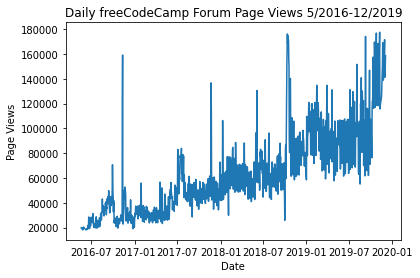

In [12]:
fi = draw_line_plot()

In [13]:
# fi?

# fi.axes?

# len(fi.axes)

# fi.axes[0]

# fi.axes[0].get_title()

## draw_bar_plot

In [14]:
# show average daily page views for each month grouped by year
# legend should show month labels and have a title of "Months"
# On the chart, the label on the x axis should be "Years"
# and the label on the y axis should be "Average Page Views".

In [15]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    #     df_bar = df.copy()
    df_bar = views_cleaned.copy()

    # add year
    df_bar['year'] = df_bar.index.year
    df_bar.year.value_counts().sort_index()

    # add month name
    df_bar['month'] = df_bar.index.month_name()
    df_bar.month.value_counts(normalize=True).mul(100).round(1)

    # add month index
    df_bar['month_index'] = df_bar.index.month

    # get sorted months
    month_gr = df_bar.groupby('month')
    months_indexes = month_gr.nth(0)
    months_indexes['combo'] = tuple(zip(months_indexes.index, months_indexes.month_index))
    month_tuples = list(months_indexes.combo)
    months_ordered = sorted(month_tuples, key=lambda x: x[1])
    months_ordered = [month for month, index in months_ordered]
    # months_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    # define month as categorical data; Specify logical ordering of the category ---- ordered categories
    month_type = pd.api.types.CategoricalDtype(categories=months_ordered, ordered=True)
    df_bar['month'] = df_bar.month.astype(month_type)

    # data for bar plot
    # todo: make pivot_table instead of this lines
    df_bar.drop(columns='month_index', inplace=True)
    df_bar_gr = df_bar.groupby(['year', 'month'])
    mean = df_bar_gr.mean().sort_index()
    data_for_plot = mean.unstack()
    data_for_plot.columns = months_ordered

    # Draw bar plot
    ax = data_for_plot.plot(kind='bar', figsize=(8, 6), xlabel='Years', ylabel='Average Page Views', legend=True)
    ax.legend(title='Months')
    fig = ax.get_figure()

    # Save image and return fig (don't change this part)
    # todo: issue with saving figure
    fig.savefig('bar_plot.png', dpi=300, transparent=False)
    return fig

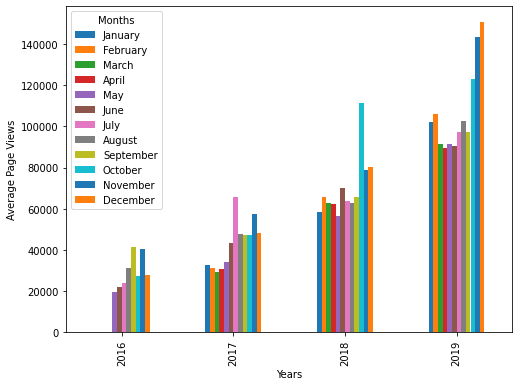

In [16]:
fig = draw_bar_plot()

## Box Plot

In [ ]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)





    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

In [17]:
df_box = views_cleaned.copy()
df_box.dtypes

value    int64
dtype: object

In [ ]:
df_box.index.dtype

In [ ]:
df_box.index[0]

In [ ]:
df_box.index[0].year

In [ ]:
df_box.index.year

In [ ]:
df_box.index

In [ ]:
dir(df_box.index)

In [ ]:
df_box.index?

In [ ]:
df_box.reset_index(inplace=True)

In [ ]:
df_box.dtypes

In [ ]:
df_box.date.dtype

In [ ]:
df_box.date[0]

In [ ]:
df_box.date[0].year

In [ ]:
# todo: WHY CAN'T APPLY VECTORIZED OPERATION HERE???
df_box.date.year

In [ ]:
df_box.date

In [ ]:
df_box.loc[:, 'date']

In [ ]:
dir(df_box.loc[:, 'date'])

In [ ]:
df_box.date?

In [ ]:
(('======' * 10) + '\n')

# data prepare BOX

In [49]:
df_box = views_cleaned.copy()
df_box = views_cleaned.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box.rename({'month': 'Month', 
               'year': 'Year', 
               'value': 'Page Views', 
               'date': 'Date'}, axis=1, inplace=True)

df_box.head(8)


,Date,Page Views,Year,Month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
5,2016-06-07,18335,2016,Jun
6,2016-06-08,18072,2016,Jun
7,2016-06-09,18139,2016,Jun


### Title: 'Year-wise Box Plot (Trend)'

###### X: 'Year'
###### Y: 'Page Views'

In [ ]:
# sns.boxplot(df_box.loc[:, 'date':'year'].groupby('year').mean())

In [51]:
# data = df_box.loc[:, 'date':'year'].groupby('year').mean()
# data_1 = df_box.loc[:, 'date':'year']
data_1 = df_box.loc[:, 'Page Views':'Year']
data_1

,Page Views,Year
0,19736,2016
1,18060,2016
2,19997,2016
3,19044,2016
4,20325,2016
...,...,...
1233,138875,2019
1234,171584,2019
1235,141161,2019
1236,142918,2019


In [52]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Page Views  1238 non-null   int64
 1   Year        1238 non-null   int64
dtypes: int64(2)
memory usage: 19.5 KB


In [53]:
data_1.describe()

,Page Views,Year
count,1238.000000,1238.000000
mean,63060.147819,2017.621163
std,31674.626598,1.030389
min,18060.000000,2016.000000
25%,37244.250000,2017.000000
50%,57197.500000,2018.000000
75%,81646.500000,2018.000000
max,177588.000000,2019.000000


In [54]:
d1_gr = data_1.groupby('Year')

In [55]:
d1_gr.agg(['min', 'max', 'mean', 'std'])

Page Views                                     
            min     max           mean           std
Year                                                
2016      18060  159186   30830.746341  13973.990893
2017      23219  136744   43113.136986  13987.658565
2018      25830  176175   69569.201657  21150.318427
2019      55069  177588  100744.490196  22936.766596

In [56]:
# data_1.sort_values('year', ascending=True, inplace=True)
# sns.boxplot(x=data_1.year, y=data_1.value, data=data_1)

### Title: 'Month-wise Box Plot (Seasonality)'

###### X: 'Month'
###### Y: 'Page Views'

In [59]:
data_2 = df_box.loc[:, ['Page Views', 'Month']]
data_2

,Page Views,Month
0,19736,May
1,18060,May
2,19997,May
3,19044,May
4,20325,May
...,...,...
1233,138875,Nov
1234,171584,Nov
1235,141161,Nov
1236,142918,Dec


### Set month as category and give it order

In [66]:
months_abbr = data_2.Month.unique()

months_abbr_sorted = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

months_abbr_type = pd.api.types.CategoricalDtype(categories=months_abbr_sorted, ordered=True)

data_2['Month'] = data_2.Month.astype(months_abbr_type)

data_2

['May', 'Jun', 'Jul', 'Aug', 'Sep', ..., 'Dec', 'Jan', 'Feb', 'Mar', 'Apr']
Length: 12
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

In [71]:
# data_2.dtypes

# data_2.month

# data_2.sort_values('Month')

# data_2.sort_values('value')

# sns.boxplot(x=data_2.month, y=data_2.value, data=data_2)

# Combine box plots on one figure

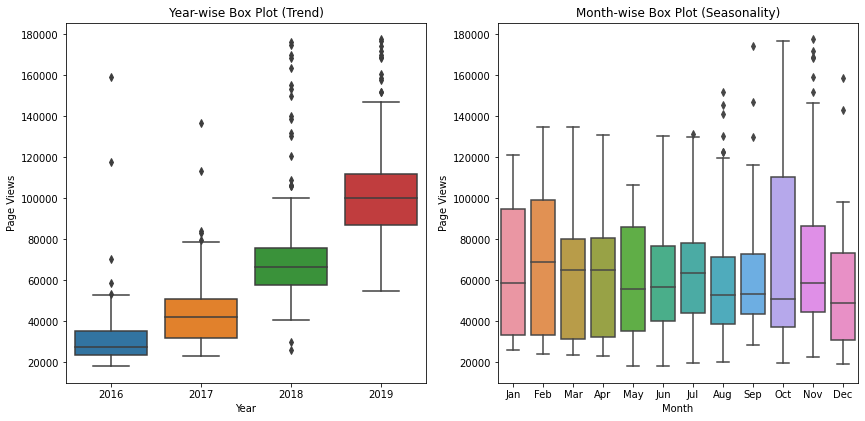

In [74]:
fig = plt.figure(figsize=(10.0, 5.0))

axes_1 = fig.add_axes([0, 0, 0.5, 1])
axes_1.set_title('Year-wise Box Plot (Trend)')
# axes_1.set_xlabel('Year')
# axes_1.set_ylabel('Page Views')
sns.boxplot(x=data_1.Year, y=data_1['Page Views'], data=data_1, ax=axes_1)

axes_2 = fig.add_axes([0.6, 0.0, 
                       0.5, 1])
axes_2.set_title('Month-wise Box Plot (Seasonality)')
# axes_2.set_xlabel('Month')
# axes_2.set_ylabel('Page Views')
sns.boxplot(x='Month', y='Page Views', data=data_2, ax=axes_2)

<AxesSubplot:title={'center':'Month-wise Box Plot (Seasonality)'}, xlabel='Month', ylabel='Page Views'>

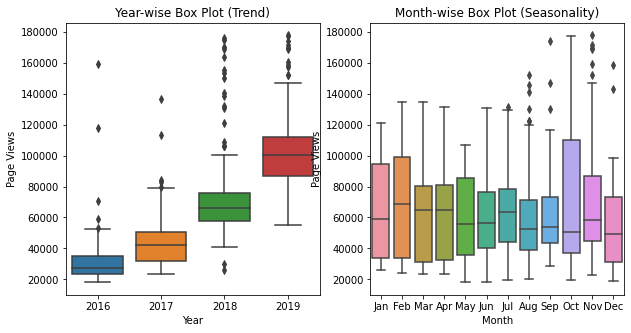

In [75]:
fig, axes_list = plt.subplots(figsize=(10.0, 5.0), nrows=1, ncols=2)
axes_1 = axes_list[0]
axes_2 = axes_list[1]

# axes_1 = fig.add_axes([0, 0, 0.5, 1])
axes_1.set_title('Year-wise Box Plot (Trend)')
# axes_1.set_xlabel('Year')
# axes_1.set_ylabel('Page Views')
sns.boxplot(x=data_1.Year, y=data_1['Page Views'], data=data_1, ax=axes_1)

# axes_2 = fig.add_axes([0.6, 0.0, 0.5, 1])
axes_2.set_title('Month-wise Box Plot (Seasonality)')
# axes_2.set_xlabel('Month')
# axes_2.set_ylabel('Page Views')
sns.boxplot(x='Month', y='Page Views', data=data_2, ax=axes_2)

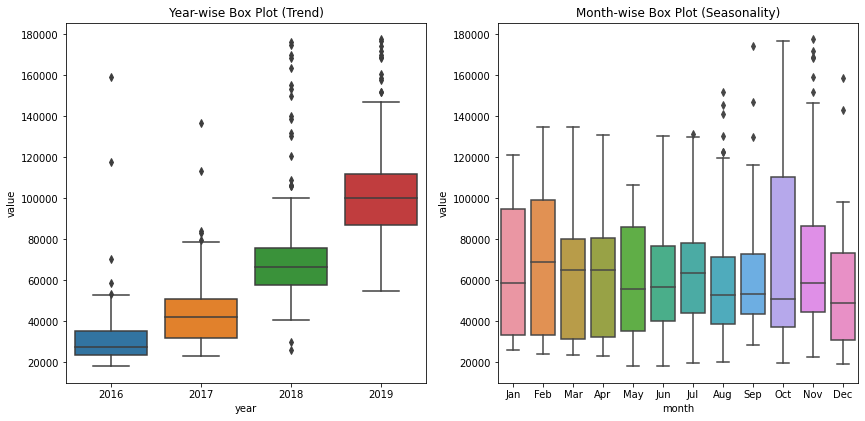

In [35]:
fig

In [ ]:
fig.add_gridspec

# Bar Plot

### Copy dataframe

In [ ]:
vc = views_cleaned.copy()

In [ ]:
vc.head()

### Add year 

In [ ]:
vc['year'] = vc.index.year

In [ ]:
vc.head()

In [ ]:
vc.index[0]

In [ ]:
vc.index[0].year

In [ ]:
vc.year.value_counts().sort_index()

### Add month name

In [ ]:
vc['month'] = vc.index.month_name()

In [ ]:
vc.month.value_counts(normalize=True).mul(100).round(1)

In [ ]:
vc.head()

### Add month index

In [ ]:
vc['month_index'] = vc.index.month

In [ ]:
vc.head()

In [ ]:
vc.dtypes

### get sorted months

In [ ]:
month_gr = vc.groupby('month')

In [ ]:
months_indexes = month_gr.nth(0)
months_indexes

In [ ]:
months_indexes['combo'] = tuple(zip(months_indexes.index, months_indexes.month_index))
months_indexes

In [ ]:
month_tuples = list(months_indexes.combo)
# list(month_tuples)
# month_tuples
month_tuples

In [ ]:
months_ordered = sorted(month_tuples, key=lambda x: x[1])
months_ordered = [month for month, index in months_ordered]
# months_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_ordered

# todo: define month as categorical data; Specify logical ordering of the category ---- ordered categories

In [ ]:
month_type = pd.api.types.CategoricalDtype(categories=months_ordered, ordered=True)

In [ ]:
vc['month'] = vc.month.astype(month_type)

In [ ]:
vc.dtypes

## data for bar plot

In [ ]:
vc.drop(columns='month_index', inplace=True)
vc

In [ ]:
vcg = vc.groupby(['year', 'month'])

In [ ]:
vcg.mean().sort_index().head(10)

In [ ]:
vcg.mean().sort_index().plot(kind='bar')

## rotate data to get year as index and months list as columns

In [ ]:
mean = vcg.mean().sort_index()

In [ ]:
mean.head(10)

In [ ]:
xx = mean.unstack()
xx

In [ ]:
xx.index

In [ ]:
xx.columns

In [ ]:
xx.columns = months_ordered

In [ ]:
xx

In [ ]:
ax = xx.plot(kind='bar', figsize=(8, 6), 
            xlabel='Years', 
            ylabel='Average Page Views', 
            legend=True)

ax.legend(title='Months')

In [ ]:
ax.legend?

In [ ]:
print(type(ax))
ax

In [ ]:
fig = ax.get_figure()

In [ ]:
fig.savefig('wow.png', dpi=200, transparent=False)

In [ ]:
ax = fig.axes[0]
ax